In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.4707 - accuracy: 0.3421
Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 1s 1s/step - loss: 1.4707 - accuracy: 0.3421 - val_loss: 1.3112 - val_accuracy: 0.3333
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1.5128 - accuracy: 0.3509
Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 449ms/step - loss: 1.5128 - accuracy: 0.3509 - val_loss: 1.2974 - val_accuracy: 0.4103
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 1.5390 - accuracy: 0.3246
Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 149ms/step - loss: 1.5390 - accuracy: 0.3246 - val_loss: 1.2841 - val_accuracy: 0.4872
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 1.3805 - accuracy: 0.3158


1/1 [==============================] - ETA: 0s - loss: 1.1771 - accuracy: 0.5175
Epoch 00028: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 1.1771 - accuracy: 0.5175 - val_loss: 1.0366 - val_accuracy: 0.5385
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 1.1706 - accuracy: 0.5439
Epoch 00029: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 1.1706 - accuracy: 0.5439 - val_loss: 1.0285 - val_accuracy: 0.5385
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 1.1832 - accuracy: 0.5439
Epoch 00030: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.1832 - accuracy: 0.5439 - val_loss: 1.0205 - val_accuracy: 0.5897
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 1.1926 - accuracy: 0.5263
Epoch 0003

1/1 [==============================] - ETA: 0s - loss: 1.0359 - accuracy: 0.5965
Epoch 00055: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 1.0359 - accuracy: 0.5965 - val_loss: 0.8481 - val_accuracy: 0.6667
Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 1.0512 - accuracy: 0.5702
Epoch 00056: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 1.0512 - accuracy: 0.5702 - val_loss: 0.8427 - val_accuracy: 0.6667
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 1.0075 - accuracy: 0.5877
Epoch 00057: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 1.0075 - accuracy: 0.5877 - val_loss: 0.8372 - val_accuracy: 0.6667
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.5789
Epoch 0005

1/1 [==============================] - ETA: 0s - loss: 0.8801 - accuracy: 0.6228
Epoch 00082: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 99ms/step - loss: 0.8801 - accuracy: 0.6228 - val_loss: 0.7232 - val_accuracy: 0.6667
Epoch 83/1000
1/1 [==============================] - ETA: 0s - loss: 0.9115 - accuracy: 0.6053
Epoch 00083: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 117ms/step - loss: 0.9115 - accuracy: 0.6053 - val_loss: 0.7189 - val_accuracy: 0.6667
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 0.9017 - accuracy: 0.5965
Epoch 00084: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 103ms/step - loss: 0.9017 - accuracy: 0.5965 - val_loss: 0.7146 - val_accuracy: 0.6667
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 0.9237 - accuracy: 0.5877
Epoch 00

Epoch 109/1000
1/1 [==============================] - ETA: 0s - loss: 0.8451 - accuracy: 0.5965
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 116ms/step - loss: 0.8451 - accuracy: 0.5965 - val_loss: 0.6301 - val_accuracy: 0.6923
Epoch 110/1000
1/1 [==============================] - ETA: 0s - loss: 0.7988 - accuracy: 0.6404
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 126ms/step - loss: 0.7988 - accuracy: 0.6404 - val_loss: 0.6274 - val_accuracy: 0.6923
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 0.8240 - accuracy: 0.6228
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 108ms/step - loss: 0.8240 - accuracy: 0.6228 - val_loss: 0.6248 - val_accuracy: 0.6923
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 0.8031 - accura

Epoch 136/1000
1/1 [==============================] - ETA: 0s - loss: 0.7244 - accuracy: 0.6754
Epoch 00136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 102ms/step - loss: 0.7244 - accuracy: 0.6754 - val_loss: 0.5620 - val_accuracy: 0.7949
Epoch 137/1000
1/1 [==============================] - ETA: 0s - loss: 0.6994 - accuracy: 0.6579
Epoch 00137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 104ms/step - loss: 0.6994 - accuracy: 0.6579 - val_loss: 0.5596 - val_accuracy: 0.7949
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 0.7610 - accuracy: 0.6404
Epoch 00138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 105ms/step - loss: 0.7610 - accuracy: 0.6404 - val_loss: 0.5572 - val_accuracy: 0.8205
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 0.7171 - accura

Epoch 163/1000
1/1 [==============================] - ETA: 0s - loss: 0.6447 - accuracy: 0.7632
Epoch 00163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.6447 - accuracy: 0.7632 - val_loss: 0.4968 - val_accuracy: 1.0000
Epoch 164/1000
1/1 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.7105
Epoch 00164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 114ms/step - loss: 0.6545 - accuracy: 0.7105 - val_loss: 0.4945 - val_accuracy: 1.0000
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 0.7086 - accuracy: 0.6579
Epoch 00165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 132ms/step - loss: 0.7086 - accuracy: 0.6579 - val_loss: 0.4920 - val_accuracy: 1.0000
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 0.6276 - accurac

Epoch 190/1000
1/1 [==============================] - ETA: 0s - loss: 0.5505 - accuracy: 0.7719
Epoch 00190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 101ms/step - loss: 0.5505 - accuracy: 0.7719 - val_loss: 0.4305 - val_accuracy: 1.0000
Epoch 191/1000
1/1 [==============================] - ETA: 0s - loss: 0.6048 - accuracy: 0.7193
Epoch 00191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 111ms/step - loss: 0.6048 - accuracy: 0.7193 - val_loss: 0.4282 - val_accuracy: 1.0000
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 0.6179 - accuracy: 0.7544
Epoch 00192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 123ms/step - loss: 0.6179 - accuracy: 0.7544 - val_loss: 0.4260 - val_accuracy: 1.0000
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 0.5704 - accura

Epoch 217/1000
1/1 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.7368
Epoch 00217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 117ms/step - loss: 0.5778 - accuracy: 0.7368 - val_loss: 0.3763 - val_accuracy: 1.0000
Epoch 218/1000
1/1 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.7982
Epoch 00218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 115ms/step - loss: 0.5321 - accuracy: 0.7982 - val_loss: 0.3734 - val_accuracy: 1.0000
Epoch 219/1000
1/1 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.7632
Epoch 00219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 104ms/step - loss: 0.5532 - accuracy: 0.7632 - val_loss: 0.3705 - val_accuracy: 1.0000
Epoch 220/1000
1/1 [==============================] - ETA: 0s - loss: 0.5618 - accura

Epoch 244/1000
1/1 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.7807
Epoch 00244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 126ms/step - loss: 0.5097 - accuracy: 0.7807 - val_loss: 0.3288 - val_accuracy: 1.0000
Epoch 245/1000
1/1 [==============================] - ETA: 0s - loss: 0.5275 - accuracy: 0.7895
Epoch 00245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 106ms/step - loss: 0.5275 - accuracy: 0.7895 - val_loss: 0.3279 - val_accuracy: 1.0000
Epoch 246/1000
1/1 [==============================] - ETA: 0s - loss: 0.5659 - accuracy: 0.7456
Epoch 00246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 465ms/step - loss: 0.5659 - accuracy: 0.7456 - val_loss: 0.3273 - val_accuracy: 1.0000
Epoch 247/1000
1/1 [==============================] - ETA: 0s - loss: 0.5104 - accura

Epoch 271/1000
1/1 [==============================] - ETA: 0s - loss: 0.5049 - accuracy: 0.7807
Epoch 00271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 112ms/step - loss: 0.5049 - accuracy: 0.7807 - val_loss: 0.2847 - val_accuracy: 1.0000
Epoch 272/1000
1/1 [==============================] - ETA: 0s - loss: 0.4803 - accuracy: 0.8509
Epoch 00272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 109ms/step - loss: 0.4803 - accuracy: 0.8509 - val_loss: 0.2837 - val_accuracy: 1.0000
Epoch 273/1000
1/1 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.7807
Epoch 00273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 111ms/step - loss: 0.4944 - accuracy: 0.7807 - val_loss: 0.2827 - val_accuracy: 1.0000
Epoch 274/1000
1/1 [==============================] - ETA: 0s - loss: 0.5090 - accura

Epoch 298/1000
1/1 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.8421
Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 102ms/step - loss: 0.4310 - accuracy: 0.8421 - val_loss: 0.2568 - val_accuracy: 1.0000
Epoch 299/1000
1/1 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.7632
Epoch 00299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 114ms/step - loss: 0.5238 - accuracy: 0.7632 - val_loss: 0.2553 - val_accuracy: 1.0000
Epoch 300/1000
1/1 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.8070
Epoch 00300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 124ms/step - loss: 0.4383 - accuracy: 0.8070 - val_loss: 0.2538 - val_accuracy: 1.0000
Epoch 301/1000
1/1 [==============================] - ETA: 0s - loss: 0.4770 - accura

Epoch 325/1000
1/1 [==============================] - ETA: 0s - loss: 0.4031 - accuracy: 0.8421
Epoch 00325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 122ms/step - loss: 0.4031 - accuracy: 0.8421 - val_loss: 0.2245 - val_accuracy: 1.0000
Epoch 326/1000
1/1 [==============================] - ETA: 0s - loss: 0.4956 - accuracy: 0.7544
Epoch 00326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 137ms/step - loss: 0.4956 - accuracy: 0.7544 - val_loss: 0.2234 - val_accuracy: 1.0000
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.8333
Epoch 00327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 107ms/step - loss: 0.4033 - accuracy: 0.8333 - val_loss: 0.2223 - val_accuracy: 1.0000
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 0.3838 - accura

Epoch 352/1000
1/1 [==============================] - ETA: 0s - loss: 0.4276 - accuracy: 0.8333
Epoch 00352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 117ms/step - loss: 0.4276 - accuracy: 0.8333 - val_loss: 0.2076 - val_accuracy: 1.0000
Epoch 353/1000
1/1 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8509
Epoch 00353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 125ms/step - loss: 0.3671 - accuracy: 0.8509 - val_loss: 0.2075 - val_accuracy: 1.0000
Epoch 354/1000
1/1 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.7719
Epoch 00354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 122ms/step - loss: 0.4393 - accuracy: 0.7719 - val_loss: 0.2075 - val_accuracy: 1.0000
Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 0.3836 - accura

Epoch 379/1000
1/1 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.8070
Epoch 00379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 119ms/step - loss: 0.4087 - accuracy: 0.8070 - val_loss: 0.1888 - val_accuracy: 1.0000
Epoch 380/1000
1/1 [==============================] - ETA: 0s - loss: 0.4372 - accuracy: 0.7807
Epoch 00380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 125ms/step - loss: 0.4372 - accuracy: 0.7807 - val_loss: 0.1884 - val_accuracy: 1.0000
Epoch 381/1000
1/1 [==============================] - ETA: 0s - loss: 0.3770 - accuracy: 0.8246
Epoch 00381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 100ms/step - loss: 0.3770 - accuracy: 0.8246 - val_loss: 0.1878 - val_accuracy: 1.0000
Epoch 382/1000
1/1 [==============================] - ETA: 0s - loss: 0.3344 - accura

Epoch 406/1000
1/1 [==============================] - ETA: 0s - loss: 0.3759 - accuracy: 0.8596
Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 109ms/step - loss: 0.3759 - accuracy: 0.8596 - val_loss: 0.1745 - val_accuracy: 1.0000
Epoch 407/1000
1/1 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8421
Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 124ms/step - loss: 0.4091 - accuracy: 0.8421 - val_loss: 0.1741 - val_accuracy: 1.0000
Epoch 408/1000
1/1 [==============================] - ETA: 0s - loss: 0.3791 - accuracy: 0.8333
Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 106ms/step - loss: 0.3791 - accuracy: 0.8333 - val_loss: 0.1737 - val_accuracy: 1.0000
Epoch 409/1000
1/1 [==============================] - ETA: 0s - loss: 0.4013 - accura

Epoch 433/1000
1/1 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.8246
Epoch 00433: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 113ms/step - loss: 0.3767 - accuracy: 0.8246 - val_loss: 0.1616 - val_accuracy: 1.0000
Epoch 434/1000
1/1 [==============================] - ETA: 0s - loss: 0.3466 - accuracy: 0.8772
Epoch 00434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 133ms/step - loss: 0.3466 - accuracy: 0.8772 - val_loss: 0.1611 - val_accuracy: 1.0000
Epoch 435/1000
1/1 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8772
Epoch 00435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 105ms/step - loss: 0.3610 - accuracy: 0.8772 - val_loss: 0.1604 - val_accuracy: 1.0000
Epoch 436/1000
1/1 [==============================] - ETA: 0s - loss: 0.3636 - accura

Epoch 460/1000
1/1 [==============================] - ETA: 0s - loss: 0.4036 - accuracy: 0.8158
Epoch 00460: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 103ms/step - loss: 0.4036 - accuracy: 0.8158 - val_loss: 0.1515 - val_accuracy: 1.0000
Epoch 461/1000
1/1 [==============================] - ETA: 0s - loss: 0.2944 - accuracy: 0.8947
Epoch 00461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 119ms/step - loss: 0.2944 - accuracy: 0.8947 - val_loss: 0.1511 - val_accuracy: 1.0000
Epoch 462/1000
1/1 [==============================] - ETA: 0s - loss: 0.3724 - accuracy: 0.8421
Epoch 00462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 123ms/step - loss: 0.3724 - accuracy: 0.8421 - val_loss: 0.1507 - val_accuracy: 1.0000
Epoch 463/1000
1/1 [==============================] - ETA: 0s - loss: 0.3145 - accura

Epoch 487/1000
1/1 [==============================] - ETA: 0s - loss: 0.3719 - accuracy: 0.8333
Epoch 00487: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 131ms/step - loss: 0.3719 - accuracy: 0.8333 - val_loss: 0.1465 - val_accuracy: 1.0000
Epoch 488/1000
1/1 [==============================] - ETA: 0s - loss: 0.3724 - accuracy: 0.8158
Epoch 00488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 159ms/step - loss: 0.3724 - accuracy: 0.8158 - val_loss: 0.1462 - val_accuracy: 1.0000
Epoch 489/1000
1/1 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8684
Epoch 00489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 115ms/step - loss: 0.3610 - accuracy: 0.8684 - val_loss: 0.1459 - val_accuracy: 1.0000
Epoch 490/1000
1/1 [==============================] - ETA: 0s - loss: 0.4421 - accura

Epoch 514/1000
1/1 [==============================] - ETA: 0s - loss: 0.3284 - accuracy: 0.8596
Epoch 00514: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 126ms/step - loss: 0.3284 - accuracy: 0.8596 - val_loss: 0.1452 - val_accuracy: 1.0000
Epoch 515/1000
1/1 [==============================] - ETA: 0s - loss: 0.3431 - accuracy: 0.8421
Epoch 00515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 122ms/step - loss: 0.3431 - accuracy: 0.8421 - val_loss: 0.1452 - val_accuracy: 1.0000
Epoch 516/1000
1/1 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.9123
Epoch 00516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 121ms/step - loss: 0.2630 - accuracy: 0.9123 - val_loss: 0.1450 - val_accuracy: 1.0000
Epoch 517/1000
1/1 [==============================] - ETA: 0s - loss: 0.3144 - accura

Epoch 541/1000
1/1 [==============================] - ETA: 0s - loss: 0.2723 - accuracy: 0.9035
Epoch 00541: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 109ms/step - loss: 0.2723 - accuracy: 0.9035 - val_loss: 0.1351 - val_accuracy: 1.0000
Epoch 542/1000
1/1 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.8596
Epoch 00542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 114ms/step - loss: 0.3141 - accuracy: 0.8596 - val_loss: 0.1347 - val_accuracy: 1.0000
Epoch 543/1000
1/1 [==============================] - ETA: 0s - loss: 0.4402 - accuracy: 0.8333
Epoch 00543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 111ms/step - loss: 0.4402 - accuracy: 0.8333 - val_loss: 0.1346 - val_accuracy: 1.0000
Epoch 544/1000
1/1 [==============================] - ETA: 0s - loss: 0.3184 - accura

Epoch 568/1000
1/1 [==============================] - ETA: 0s - loss: 0.2545 - accuracy: 0.9035
Epoch 00568: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 480ms/step - loss: 0.2545 - accuracy: 0.9035 - val_loss: 0.1361 - val_accuracy: 1.0000
Epoch 569/1000
1/1 [==============================] - ETA: 0s - loss: 0.2823 - accuracy: 0.8860
Epoch 00569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 135ms/step - loss: 0.2823 - accuracy: 0.8860 - val_loss: 0.1358 - val_accuracy: 1.0000
Epoch 570/1000
1/1 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.9123
Epoch 00570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 140ms/step - loss: 0.3010 - accuracy: 0.9123 - val_loss: 0.1354 - val_accuracy: 1.0000
Epoch 00570: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 37ms/step - loss: 0.1354 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.9026156e-01 4.5922562e-04 5.8588749e-01 2.3391677e-02]
2


# Confusion matrix

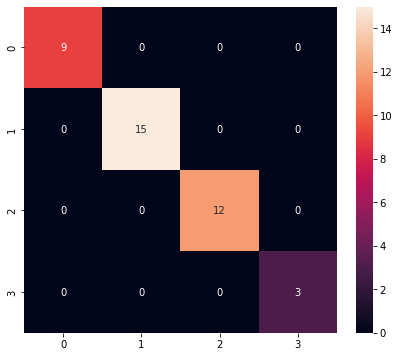

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MISTER~1\AppData\Local\Temp\tmpx33glj35\assets


6416

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.9026150e-01 4.5922506e-04 5.8588761e-01 2.3391660e-02]
2
